In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploração com os dados brutos

In [2]:
df = pd.read_csv('../data/raw/dataset_imoveis_sp.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [3]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [4]:
df = pd.read_csv('../data/raw/dataset_imoveis_sp.csv')
df['district'].value_counts()

district
Bela Vista              352
Vila Mariana            232
Jardim Paulista         220
Centro                  178
Pinheiros               159
                       ... 
Nova Aldeinha             1
Pacaembu.                 1
Parque Munhoz             1
Jardim dos Prados         1
Bolsão do Interlagos      1
Name: count, Length: 1199, dtype: int64

## Exploração com os dados tratatos e limpos

In [5]:
df = pd.read_csv('../data/processed/dataset_imoveis_sp_clean.csv')
df.head()

,area,bedrooms,garage,rent,zone_Centro,zone_Leste,zone_Norte,zone_Oeste,zone_Sul,type_Apartamento,type_Casa,type_Casa em condomínio,type_Studio e kitnet
0,21,1,0,2400,False,True,False,False,False,False,False,False,True
1,50,2,1,3800,False,True,False,False,False,True,False,False,False
2,63,2,0,1500,True,False,False,False,False,True,False,False,False
3,34,1,0,1000,True,False,False,False,False,True,False,False,False
4,32,1,0,2100,False,True,False,False,False,False,False,False,True


In [6]:
df = pd.read_csv('../data/processed/dataset_imoveis_sp_clean.csv')
df.isnull().sum()

area                       0
bedrooms                   0
garage                     0
rent                       0
zone_Centro                0
zone_Leste                 0
zone_Norte                 0
zone_Oeste                 0
zone_Sul                   0
type_Apartamento           0
type_Casa                  0
type_Casa em condomínio    0
type_Studio e kitnet       0
dtype: int64

In [9]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from visualizations import (
    load_data,
    plot_area_vs_rent,
    plot_bedrooms_vs_rent,
    plot_garage_vs_rent,
    plot_area_vs_rent_by_zone,
    plot_avg_rent_by_zone,
    plot_avg_rent_by_property_type
)

df_clean = load_data('../data/processed/dataset_imoveis_sp_clean.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/dataset_imoveis_sp_clean.csv'

In [8]:
plot_area_vs_rent(df_clean)

NameError: name 'plot_area_vs_rent' is not defined

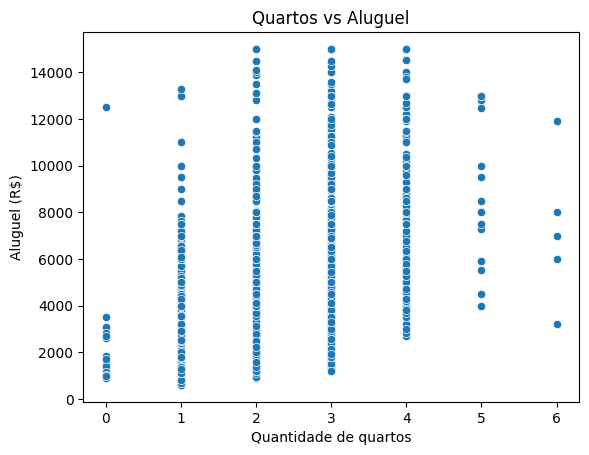

In [25]:
plot_bedrooms_vs_rent(df_clean)

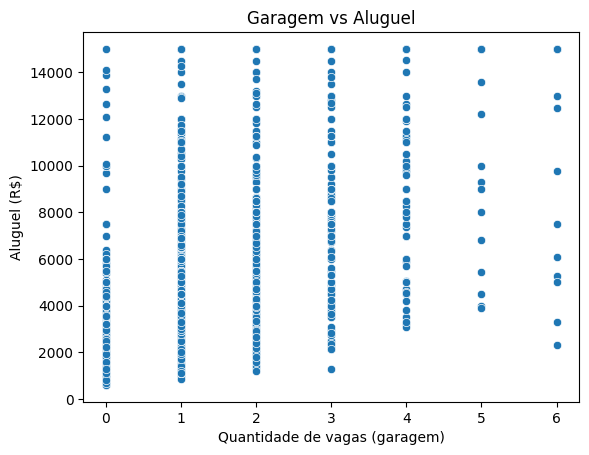

In [26]:
plot_garage_vs_rent(df_clean)

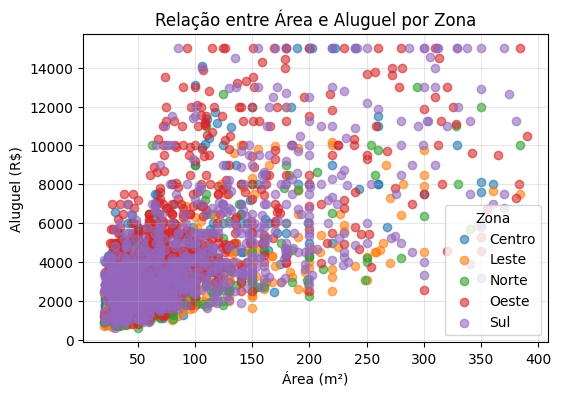

In [27]:
plot_area_vs_rent_by_zone(df_clean)

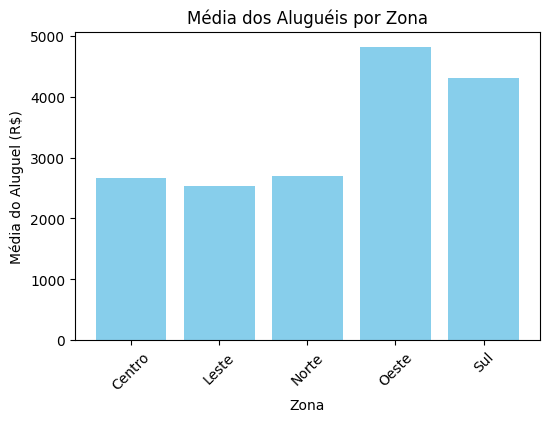

In [28]:
plot_avg_rent_by_zone(df_clean)

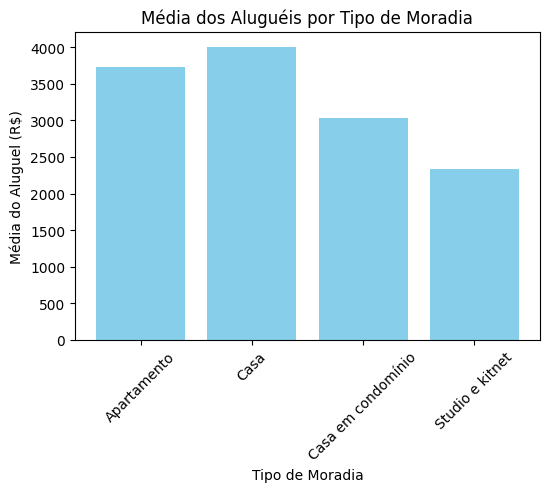

In [30]:
plot_avg_rent_by_property_type(df_clean)